Having wrangled a codon frequency data set and incorporated a dictionary linking amino acids to the codons that encode them, I'm ready to proceed to do some EDA.  First, I'm going to need several modules for this:

In [48]:
# the usual modules and their aliases
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# restore the codon usage dataframe from the previous data wrangling notebook
codon_usage = pd.read_csv('codon_usage2.csv')

# these could prove useful later:
codon_list = ['UUU', 'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG',
       'AUU', 'AUC', 'AUA', 'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCU', 'GCC',
       'GCA', 'GCG', 'CCU', 'CCC', 'CCA', 'CCG', 'UGG', 'GGU', 'GGC', 'GGA',
       'GGG', 'UCU', 'UCC', 'UCA', 'UCG', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA',
       'ACG', 'UAU', 'UAC', 'CAA', 'CAG', 'AAU', 'AAC', 'UGU', 'UGC', 'CAU',
       'CAC', 'AAA', 'AAG', 'CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG', 'GAU',
       'GAC', 'GAA', 'GAG', 'UAA', 'UAG', 'UGA']

amino_list = ['alanine', 'arginine',
       'asparagine', 'aspartic acid', 'cysteine', 'glutamine', 'glutamic acid',
       'glycine', 'histidine', 'isoleucine', 'leucine', 'lysine', 'methionine',
       'phenylalanine', 'proline', 'serine', 'threonine', 'tryptophan',
       'tyrosine', 'valine', 'start', 'stop']

# might strip 'start' and 'stop' from the above list but let's leave it for now

# this dictionary, from the preceding notebook, could also prove quite useful
amino_codons = {'alanine': ['GCU', 'GCC', 'GCA', 'GCG'], 
                'arginine': ['CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG'],
                'asparagine': ['AAU', 'AAC'],
                'aspartic acid': ['GAU', 'GAC'],
                'cysteine': ['UGU', 'UGC'], 
                'glutamine': ['CAA', 'CAG'],
                'glutamic acid': ['GAA', 'GAG'],
                'glycine': ['GGU', 'GGC', 'GGA', 'GGG'],
                'histidine': ['CAU', 'CAC'], 
                'isoleucine': ['AUU', 'AUC', 'AUA'], 
                'leucine': ['CUU', 'CUC', 'CUA', 'CUG', 'UUA', 'UUG'],
                'lysine': ['AAA', 'AAG'], 
                'methionine': ['AUG'], 
                'phenylalanine': ['UUU', 'UUC'], 
                'proline': ['CCU', 'CCC', 'CCA', 'CCG'],
                'serine': ['UCU', 'UCC', 'UCA', 'UCG', 'AGU', 'AGC'], 
                'threonine': ['ACU', 'ACC', 'ACA', 'ACG'], 
                'tryptophan': ['UGG'],
                'tyrosine': ['UAU', 'UAC'], 
                'valine': ['GUU', 'GUC', 'GUA', 'GUG'], 
                'start': ['AUG'], 
                'stop': ['UAA', 'UAG', 'UGA']}



In [49]:
# examine the codon usage dataframe
print(codon_usage.columns)
print(codon_usage.shape)

Index(['Unnamed: 0', 'Kingdom', 'DNAtype', 'SpeciesID', 'Ncodons',
       'SpeciesName', 'UUU', 'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG',
       'AUU', 'AUC', 'AUA', 'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCU', 'GCC',
       'GCA', 'GCG', 'CCU', 'CCC', 'CCA', 'CCG', 'UGG', 'GGU', 'GGC', 'GGA',
       'GGG', 'UCU', 'UCC', 'UCA', 'UCG', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA',
       'ACG', 'UAU', 'UAC', 'CAA', 'CAG', 'AAU', 'AAC', 'UGU', 'UGC', 'CAU',
       'CAC', 'AAA', 'AAG', 'CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG', 'GAU',
       'GAC', 'GAA', 'GAG', 'UAA', 'UAG', 'UGA', 'alanine', 'arginine',
       'asparagine', 'aspartic acid', 'cysteine', 'glutamine', 'glutamic acid',
       'glycine', 'histidine', 'isoleucine', 'leucine', 'lysine', 'methionine',
       'phenylalanine', 'proline', 'serine', 'threonine', 'tryptophan',
       'tyrosine', 'valine', 'start', 'stop'],
      dtype='object')
(13028, 92)


In [12]:
codon_usage.head()

,Unnamed: 0,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,...,methionine,phenylalanine,proline,serine,threonine,tryptophan,tyrosine,valine,start,stop
0,0,virus,genomic,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,...,0.02506,0.02857,0.07268,0.06115,0.04561,0.01003,0.02757,0.09423,0.02506,0.00301
1,1,virus,genomic,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,...,0.03324,0.04071,0.05020,0.06581,0.05768,0.01425,0.03392,0.08955,0.03324,0.00339
2,2,virus,genomic,100755,4862,Sweet potato leaf curl virus,0.01974,0.02180,0.01357,0.01543,...,0.02180,0.04154,0.06232,0.08289,0.05491,0.01728,0.03887,0.05780,0.02180,0.00535
3,3,virus,genomic,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,...,0.02924,0.04020,0.03760,0.09191,0.06215,0.01201,0.03029,0.07885,0.02924,0.00418
4,4,virus,genomic,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,...,0.02773,0.04187,0.02798,0.06893,0.06745,0.01205,0.03456,0.07196,0.02773,0.00175


This is to all appearances the same dataframe that was wrangled in the preceding notebook.

One interesting thing that might be explored is the distribution of these amino acids across the entire dataframe.

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

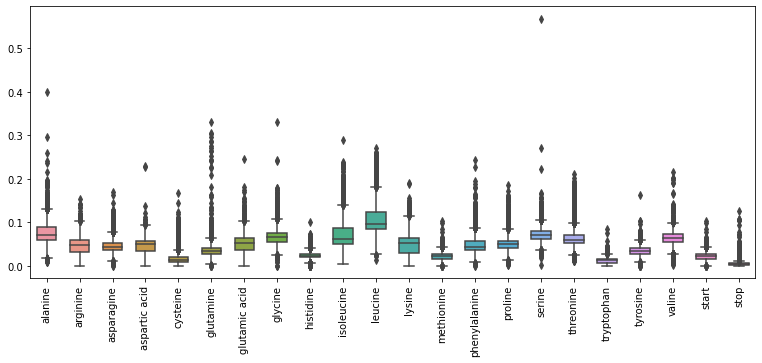

In [28]:
fig, ax = plt.subplots(figsize=(13,5))
ax = sns.boxplot(data=codon_usage[amino_list], width=0.6)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

Clearly, the amino acids have quite different distributions.  It's interesting to note that all of them have a pronounced right skew; this isn't unexpected.  But some of the outliers are quite surprising.  There are some organisms represented in these data with shockingly high proportions of their codons representing one specific amino acid - there's one for which over 50% of codons are for serine, for instance.  I wonder what that is?

In [31]:
print(codon_usage['SpeciesName'].loc[codon_usage['serine'] == codon_usage['serine'].max()], codon_usage['serine'].max())

8734    Phragmatopoma californica
Name: SpeciesName, dtype: object 0.5677399999999999


Well, that's interesting.  It's a marine polychaete worm.  https://en.wikipedia.org/wiki/Phragmatopoma_californica

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

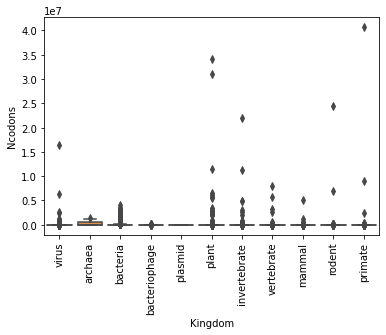

In [59]:
# let's examine the distributions for the most general factor: number of codons.

ax = sns.boxplot(data=codon_usage, x='Kingdom', y='Ncodons')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

That's not particularly informative - a handful of very extreme outliers makes the range of the boxplots so extreme that the central features can't be observed.  This can be cured by taking logarithms.  (Of course this also may need to be done for subsequent procedures, so I'll just incorporate it into the dataframe.)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

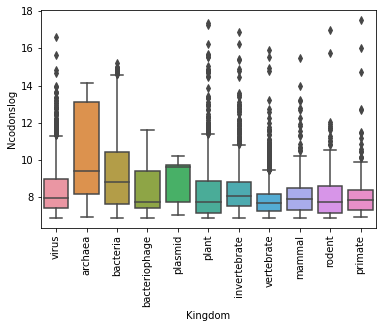

In [58]:
codon_usage['Ncodonslog'] = np.log(codon_usage['Ncodons'])
ax = sns.boxplot(data=codon_usage, x='Kingdom', y='Ncodonslog')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

Note: this EDA is **very far** from complete.  But I'm going to submit it now, because the [None....None] when invoking boxplots is making me kind of crazy and I haven't yet figured out how to stop this.  I could use a little help if possible.